# Demo of `BaselineRegressor` Class and its Methods

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries and data</a></span><ul class="toc-item"><li><span><a href="#Check-dataframe-structure" data-toc-modified-id="Check-dataframe-structure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Check dataframe structure</a></span></li></ul></li><li><span><a href="#Initialize-the-models" data-toc-modified-id="Initialize-the-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialize the models</a></span></li><li><span><a href="#Use-the-function-go_quickDirty-for-one-step-linear-regression-modelling" data-toc-modified-id="Use-the-function-go_quickDirty-for-one-step-linear-regression-modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Use the function <code>go_quickDirty</code> for one-step linear regression modelling</a></span><ul class="toc-item"><li><span><a href="#Compare-to-Naive-Baseline---NOT-YET-IMPLEMENTED-FOR-REGRESSION" data-toc-modified-id="Compare-to-Naive-Baseline---NOT-YET-IMPLEMENTED-FOR-REGRESSION-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Compare to Naive Baseline - NOT YET IMPLEMENTED FOR REGRESSION</a></span></li><li><span><a href="#Evaluate-the-model-in-more-detail" data-toc-modified-id="Evaluate-the-model-in-more-detail-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluate the model in more detail</a></span></li></ul></li><li><span><a href="#Use-the-function-go_quickDirty-for-one-step-tree-based-modelling" data-toc-modified-id="Use-the-function-go_quickDirty-for-one-step-tree-based-modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use the function <code>go_quickDirty</code> for one-step tree-based modelling</a></span><ul class="toc-item"><li><span><a href="#Examine-feature-weights" data-toc-modified-id="Examine-feature-weights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Examine feature weights</a></span></li></ul></li></ul></div>

## Load libraries and data

In [3]:
import numpy as np
import pandas as pd

import EDA_functions, cleaning_functions
from baseline_regressor import BaselineRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import resample  # for error calculation of feature weights

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# display all columns in df
from IPython.display import display
pd.options.display.max_columns = None

** WORK IN PROGRESS, ACTUALLY NOT EVEN STARTED YET **

In [4]:
housing = pd.read_csv('../data/housing.csv')

### Check dataframe structure
(For real projects some of the steps below should only be performed after separating the test set)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4257,-118.35,34.10,24.0,5477.0,1803.0,2863.0,1755.0,1.8450,237500.0,<1H OCEAN
6984,-118.02,33.96,36.0,2071.0,398.0,988.0,404.0,4.6226,219700.0,<1H OCEAN
9678,-118.99,37.65,20.0,2474.0,625.0,338.0,141.0,5.0100,195500.0,INLAND


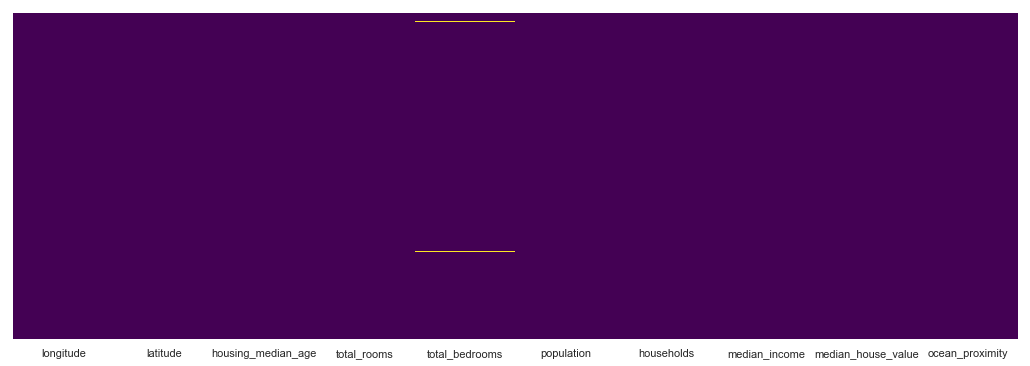

In [7]:
cleaning_functions.plot_NaN(housing)

In [8]:
cleaning_functions.list_NaN(housing)

,total,percent,dtype
total_bedrooms,207,1.0,float64


## Initialize the models

First step is to initialize a (or a couple of different) linear scikit-learn model object with it's correspoding parameters. 

In [9]:
"Logistic regression model"

# Define a scikit-learn model object you want to work with
model_lin = LinearRegression(normalize=True)
# Create an instance of the LinRegModel class by passing the dataframe, the target variable and the model object
linReg_simple = BaselineRegression(housing, 'median_house_value', model_lin)

In [10]:
# You can output the model with help of the instance variable name
linReg_simple

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
"Random Forest model"

# Define a scikit-learn model object you want to work with
model_rf = RandomForestRegressor(n_estimators=30)
# Create an instance of the LinRegModel class by passing the dataframe, the target variable and the model object
rf_simple = BaselineRegression(housing, 'median_house_value', model_rf)

In [12]:
# You can output the model with help of the instance variable name
rf_simple

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
"Gradient Boosting model"

# Define a scikit-learn model object you want to work with
model_gbc = GradientBoostingRegressor(n_estimators=100)
# Create an instance of the LinRegModel class by passing the dataframe, the target variable and the model object
gbc_simple = BaselineRegression(housing, 'median_house_value', model_gbc)

In [19]:
# You can output the model with help of the instance variable name
gbc_simple

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

## Use the function `go_quickDirty` for one-step linear regression modelling

`go_quickDirty` is a method of the BaselineClassification class for preprocessing data, fitting and testing a regression model _in one step_. You can pass (almost) any unprepared data. (It is called quick & dirty because the preprocessing is quite unsophisticated: NA values will be  handled in a simple way, categorical variables dummied. But there is no outlier treatment or scaling.)

Details on preprocessing for non-tree-based models:
- All columns with dtype object and category will be one-hot-encoded. (Make sure they all have categorical character.)
- All NaN in numerical cols will be imputed with mean, all NaN in non-numerical columns will be dummied (for mixing into the zero category, change the 'dummy_na' parameter)

In [20]:
# Perform linear regression modelling on instance
linReg_simple.go_quickDirty(tree_based=False, transform=False)

LinearRegression

RMSE: 0.6038
r2: 0.6265


### Compare to Naive Baseline - NOT YET IMPLEMENTED FOR REGRESSION

For a naive baseline, we can randomly guess that an instance is of the positive class in the same frequence of the positive classified instances in the training data. We'll assess the predictions using the same metrics as the proper baseline model.

In [ ]:
# linReg_simple.compare_to_naive()

### Evaluate the model in more detail

[learning_curve] Training set sizes: [  115   717  1320  1922  2524  3126  3728  4331  4933  5535  6137  6740
  7342  7944  8546  9149  9751 10353 10955 11558]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


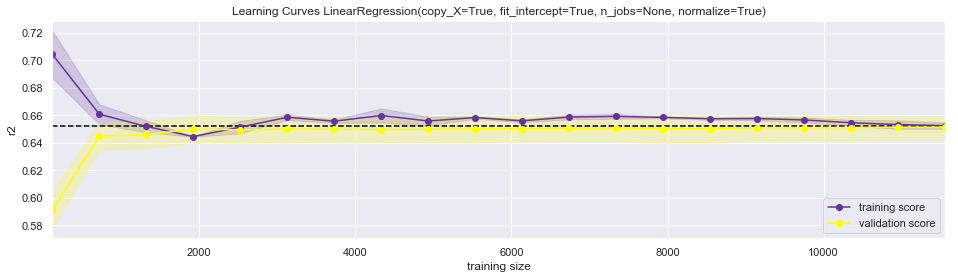

In [21]:
# Plot learning curves using 5-fold cross validation
linReg_simple.plot_learning_curves()

In [23]:
# Plot feature weights (error estimation by bootstrapping)
linReg_simple.print_coef_weights(n_bootstrap=5)

,effect,error
longitude,-0.5,0.0
latitude,-0.5,0.0
housing_median_age,-0.5,0.0
total_rooms,-0.5,0.0
total_bedrooms,-0.5,0.0
population,-0.5,0.0
households,-0.5,0.0
median_income,-0.5,0.0
ocean_proximity_INLAND,-0.5,0.0
ocean_proximity_ISLAND,-0.5,0.0


,effect,error
category,,
ocean,-2.5,0.0
total,-1.0,0.0
households,-0.5,0.0
housing,-0.5,0.0
latitude,-0.5,0.0
longitude,-0.5,0.0
median,-0.5,0.0
population,-0.5,0.0


***

## Use the function `go_quickDirty` for one-step tree-based modelling

In [24]:
# Run Random Forest
rf_simple.go_quickDirty(tree_based=True)

RandomForestRegressor

RMSE: 51119.9636
r2: 0.7989


In [25]:
# Run Gradient Boosting
gbc_simple.go_quickDirty(tree_based=True)

GradientBoostingRegressor

RMSE: 55644.6795
r2: 0.7618


### Examine feature weights

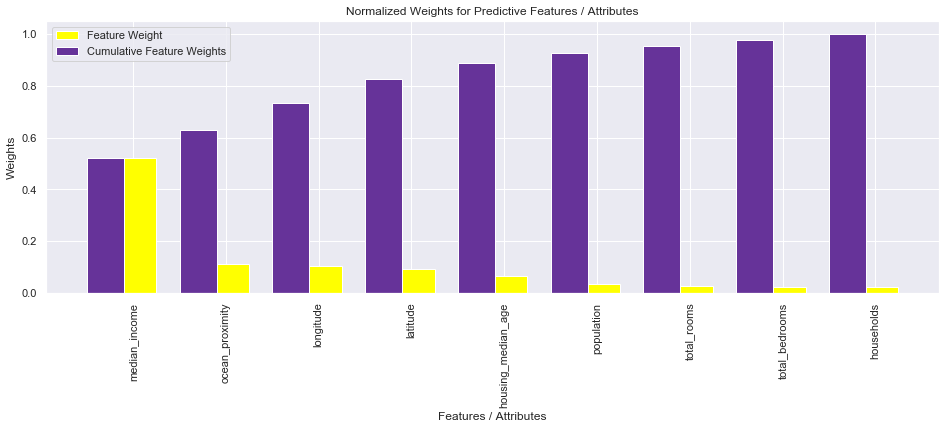

In [26]:
rf_simple.plot_feature_weights()

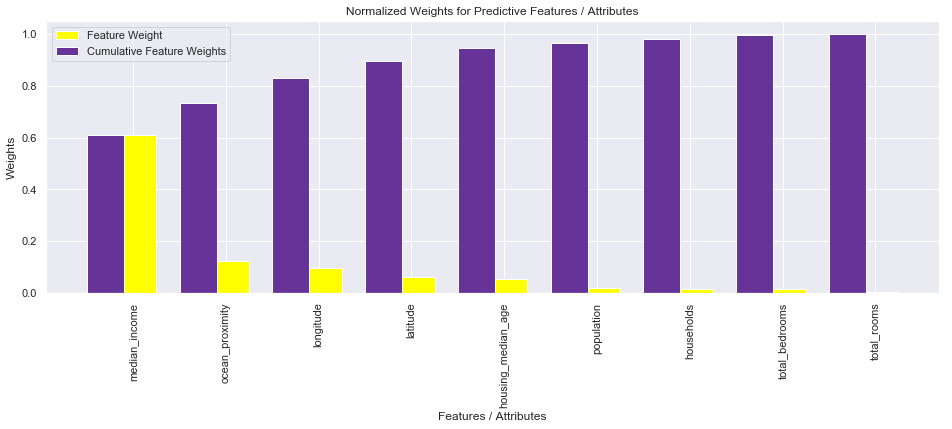

In [27]:
gbc_simple.plot_feature_weights()

---